# Comparison between K-means and HAC on datasets with different properties

In [14]:
%matplotlib inline

# Author: Phil Roth <mr.phil.roth@gmail.com>
# Adapted by Alberto Garcia-Robledo <agarciar@upv.edu.mx>
# License: BSD 3 clause

from sklearn import datasets
from sklearn.decomposition import PCA
from random import randint
import math

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn import metrics
from sklearn.cluster import DBSCAN
from random import seed



n_samples = 1500 # number of samples
random_state = 170 # random seed

#Clase Kmeans nuestra
class KmeansNuesto:
    #Atributos de la clase
    nn=0 #filas del de dataset
    mm=0 #num cols de dataset
    kk=0 #num clusters
    nchg=0 #variable que controla el cambio de posiciones de los datos
    data =[] #matriz contenedora del dataset
    means =[] #matriz contenedora de los centroides (numero de clusters)
    assign = [] #vector de membresias
    count =  [] #vector de calculos de cluster

    
    #constructor de la clase, recibe el dataset y el numero de clusters a generar como parametros
    def __init__(self, data, kk):
        self.data=data
        self.nn= data.shape[0]
        self.kk = kk
        self.nchg = data.shape[0]
        self.mm = data.shape[1]
        self.assign = [0 for x in range(self.nn)]
        self.count = [0 for x in range(self.kk)]
        self.initMeans()
        while self.nchg > 0:
            self.estep()
            self.mstep()
    
    #se inicializa el array contenedor de las posiciones de los centroides (matriz) con valores random de 0 a 16 (lo cual; casa centroide representa una imagen o las posiciones iniciales de estos)
    def initMeans(self):
        self.means = [[0 for x in range(self.mm)] for y in range(self.kk)]
        for i in range(0,self.kk):
            for j in range(0,self.mm):
                self.means[i][j] = randint(0,16)
        print self.means
                
    #Definicion del metodo estep el cual verifica los cambios de posiciones de los datos del dataset y actualiza sus membresias
    def estep(self):
        k=0
        m=0
        n=0
        kmin=0
        dmin=0.0
        d=0.0
        self.nchg=0
        for k in range(0,self.kk):
            self.count[k]=0
        for n in range(0,self.nn):
            dmin=999999999999999
            for k in range(0,self.kk):
                d=0
                for m in range(0,self.mm):
                    if((self.data[n][m] - self.means[k][m]) < 0):
                        d = d + math.sqrt((self.data[n][m] - self.means[k][m]) * -1)
                    else:
                        d = d + math.sqrt((self.data[n][m] - self.means[k][m]))
                if d < dmin:
                    dmin = d
                    kmin = k
            if kmin != self.assign[n]:
                self.nchg=self.nchg+1
            self.assign[n] = kmin
            self.count[kmin] = self.count[kmin]+1
        return self.nchg
    
    #Definicion del metodo mstep
    def mstep(self):
        global nchg, kk, nn, mm, assign, means, data,count
        n=0
        k=0
        m=0
        for k in range(0,self.kk):
            for m in range(0,self.mm):
                self.means[k][m]=0
        for n in range(0,self.nn):
            for m in range(0,self.mm):
                self.means[self.assign[n]][m] = self.means[self.assign[n]][m] + self.data[n][m]
        for k in range(0,self.kk):
            if(self.count[k]>0):
                for m in range(0,self.mm):
                    self.means[k][m] = self.means[k][m] / self.count[k]
    
    #metodo que retorna el array de membresias
    def getAssign(self):
        return self.assign
    
    #metodo que retorna las posiciones finales de los centroides (o imagenes finales)
    def getMeans(self):
        return self.means






## 1. Incorrect number of clusters

Score sklearn.kmeans metrics.adjusted_mutual_info_score =  0.557527921697
Score sklearn.kmeans metrics.adjusted_rand_score 0.563363567267
Score AgglomerativeClustering metrics.adjusted_mutual_info_score =  0.570361802223
Score AgglomerativeClustering metrics.adjusted_rand_score 0.566211380156
Score kmeans-nuestro metrics.adjusted_mutual_info_score =  0.566647363677
Score kmeans-nuestro metrics.adjusted_rand_score 0.567205485754
Score dbscan metrics.adjusted_mutual_info_score =  0.875844491654
Score dbscan metrics.adjusted_rand_score 0.947149078194


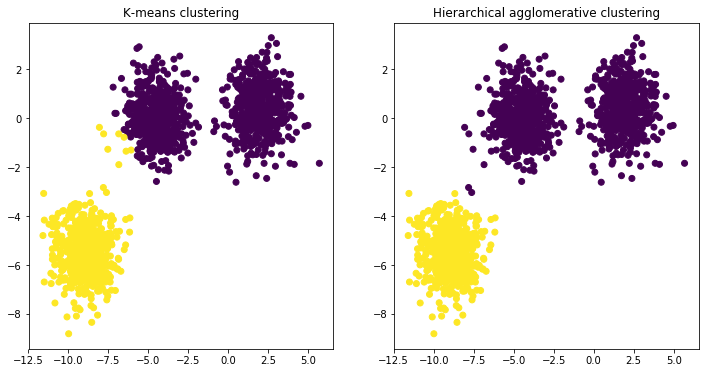

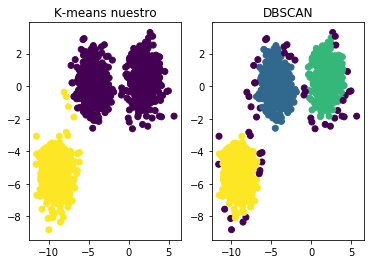

In [3]:
# prepare dataset (incorrect number of clusters)
plt.figure(figsize=(12, 6))
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# run k-means
y_pred_kmeans = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

print "Score sklearn.kmeans metrics.adjusted_mutual_info_score = ", metrics.adjusted_mutual_info_score(y,y_pred_kmeans)
print "Score sklearn.kmeans metrics.adjusted_rand_score" , metrics.adjusted_rand_score(y,y_pred_kmeans)
# run HAC
y_pred_hiearc = AgglomerativeClustering(n_clusters=2, linkage="average").fit_predict(X)
print "Score AgglomerativeClustering metrics.adjusted_mutual_info_score = ", metrics.adjusted_mutual_info_score(y,y_pred_hiearc)
print "Score AgglomerativeClustering metrics.adjusted_rand_score", metrics.adjusted_rand_score(y,y_pred_hiearc)

#Instancia de la clase kmeans, se ingresa el dataset digits y 10 como numero de clusters como parametros
kmeans = KmeansNuesto(X, 2)

#obtener membresia de k-means nuestro
membresia = kmeans.getAssign()

print "Score kmeans-nuestro metrics.adjusted_mutual_info_score = ",metrics.adjusted_mutual_info_score(y,membresia)
print "Score kmeans-nuestro metrics.adjusted_rand_score" ,metrics.adjusted_rand_score(y,membresia)

#dbscan
membresia_db = DBSCAN(metric='euclidean').fit_predict(X)
print "Score dbscan metrics.adjusted_mutual_info_score = ",metrics.adjusted_mutual_info_score(y,membresia_db)
print "Score dbscan metrics.adjusted_rand_score" ,metrics.adjusted_rand_score(y,membresia_db)

# plot k-means
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y_pred_kmeans)
plt.title("K-means clustering")

# plot HAC
plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=y_pred_hiearc)
plt.title("Hierarchical agglomerative clustering")
 
plt.show()

# plot kmeans nuestro
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=membresia)
plt.title("K-means nuestro")

# plot dbscan
plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=membresia_db)
plt.title("DBSCAN")
 
plt.show()




## 2. Anisotropically distributed data

Score sklearn.kmeans metrics.adjusted_mutual_info_score =  0.627861024723
Score sklearn.kmeans metrics.adjusted_rand_score 0.611658603315
Score AgglomerativeClustering metrics.adjusted_mutual_info_score =  0.562440027613
Score AgglomerativeClustering metrics.adjusted_rand_score 0.563778716215
[[9, 10], [13, 4], [11, 15]]
Score kmeans-nuestro metrics.adjusted_mutual_info_score =  0.474503881302
Score kmeans-nuestro metrics.adjusted_rand_score 0.428984618851
Score dbscan metrics.adjusted_mutual_info_score =  0.000538079667789
Score dbscan metrics.adjusted_rand_score 5.36186326915e-06


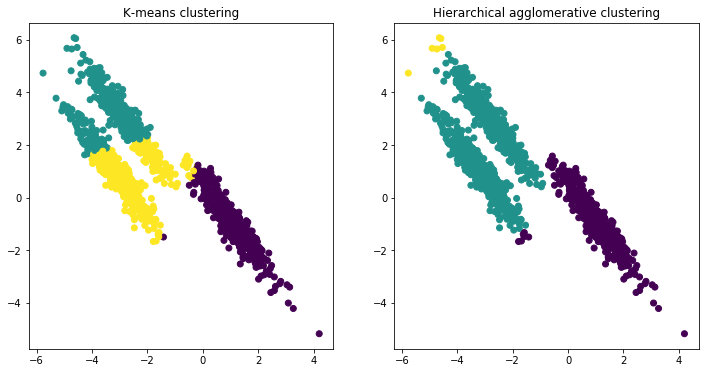

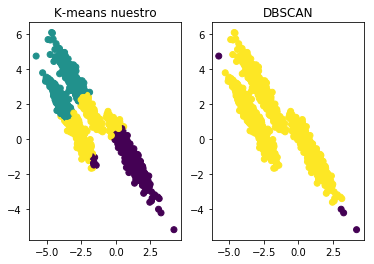

In [17]:
plt.figure(figsize=(12, 6))

# prepare dataset (anisotropically distributed data)
transformation = [[ 0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
# run k-means
y_pred_kmeans = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

print "Score sklearn.kmeans metrics.adjusted_mutual_info_score = ", metrics.adjusted_mutual_info_score(y,y_pred_kmeans)
print "Score sklearn.kmeans metrics.adjusted_rand_score" , metrics.adjusted_rand_score(y,y_pred_kmeans)

# run HAC
y_pred_hiearc = AgglomerativeClustering(n_clusters=3, linkage="average").fit_predict(X_aniso)
print "Score AgglomerativeClustering metrics.adjusted_mutual_info_score = ", metrics.adjusted_mutual_info_score(y,y_pred_hiearc)
print "Score AgglomerativeClustering metrics.adjusted_rand_score", metrics.adjusted_rand_score(y,y_pred_hiearc)
#Instancia de la clase kmeans, se ingresa el dataset digits y 10 como numero de clusters como parametros
kmeans = KmeansNuesto(X_aniso, 3)

#obtener membresia de k-means nuestro
membresia = kmeans.getAssign()
print "Score kmeans-nuestro metrics.adjusted_mutual_info_score = ",metrics.adjusted_mutual_info_score(y,membresia)
print "Score kmeans-nuestro metrics.adjusted_rand_score" ,metrics.adjusted_rand_score(y,membresia)

#dbscan
membresia_db = DBSCAN(metric='euclidean').fit_predict(X_aniso)
print "Score dbscan metrics.adjusted_mutual_info_score = ",metrics.adjusted_mutual_info_score(y,membresia_db)
print "Score dbscan metrics.adjusted_rand_score" ,metrics.adjusted_rand_score(y,membresia_db)

seed(33)


# plot k-means
plt.subplot(121)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred_kmeans)
plt.title("K-means clustering")

# plot HAC
plt.subplot(122)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred_hiearc)
plt.title("Hierarchical agglomerative clustering")
 
plt.show()

# plot kmeans nuestro
plt.subplot(121)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=membresia)
plt.title("K-means nuestro")

# plot dbscan
plt.subplot(122)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=membresia_db)
plt.title("DBSCAN")
 
plt.show()


## 3. Different variance blobs

Score sklearn.kmeans metrics.adjusted_mutual_info_score =  0.809185401376
Score sklearn.kmeans metrics.adjusted_rand_score 0.82647673383
Score AgglomerativeClustering metrics.adjusted_mutual_info_score =  0.726397363954
Score AgglomerativeClustering metrics.adjusted_rand_score 0.715879975105
Score kmeans-nuestro metrics.adjusted_mutual_info_score =  0.79867615979
Score kmeans-nuestro metrics.adjusted_rand_score 0.817508016878
Score dbscan metrics.adjusted_mutual_info_score =  0.732365713283
Score dbscan metrics.adjusted_rand_score 0.844983371495


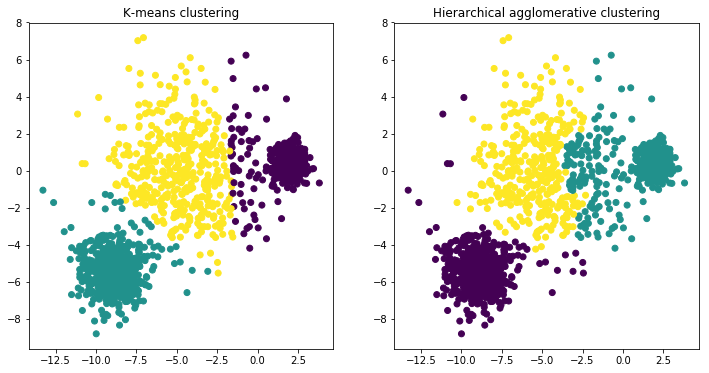

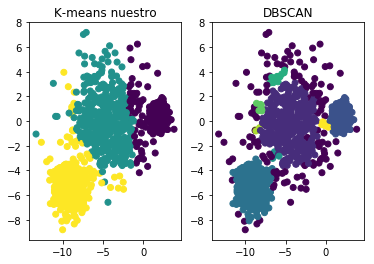

In [5]:
plt.figure(figsize=(12, 6))

# prepare dataset (different variance blobs)
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)

# run k-means
y_pred_kmeans = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)
print "Score sklearn.kmeans metrics.adjusted_mutual_info_score = ",metrics.adjusted_mutual_info_score(y_varied,y_pred_kmeans)
print "Score sklearn.kmeans metrics.adjusted_rand_score" ,metrics.adjusted_rand_score(y_varied,y_pred_kmeans)
# run HAC
y_pred_hiearc = AgglomerativeClustering(n_clusters=3, linkage="average").fit_predict(X_varied)
print "Score AgglomerativeClustering metrics.adjusted_mutual_info_score = ",metrics.adjusted_mutual_info_score(y_varied,y_pred_hiearc)
print "Score AgglomerativeClustering metrics.adjusted_rand_score" ,metrics.adjusted_rand_score(y_varied,y_pred_hiearc)
#Instancia de la clase kmeans, se ingresa el dataset digits y 10 como numero de clusters como parametros
kmeans = KmeansNuesto(X_varied, 3)

#obtener membresia de k-means nuestro
membresia = kmeans.getAssign()
print "Score kmeans-nuestro metrics.adjusted_mutual_info_score = ",metrics.adjusted_mutual_info_score(y_varied,membresia)
print "Score kmeans-nuestro metrics.adjusted_rand_score" ,metrics.adjusted_rand_score(y_varied,membresia)

#dbscan
membresia_db = DBSCAN(metric='euclidean').fit_predict(X_varied)
print "Score dbscan metrics.adjusted_mutual_info_score = ",metrics.adjusted_mutual_info_score(y_varied,membresia_db)
print "Score dbscan metrics.adjusted_rand_score" ,metrics.adjusted_rand_score(y_varied,membresia_db)

# plot k-means
plt.subplot(121)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred_kmeans)
plt.title("K-means clustering")

# plot HAC
plt.subplot(122)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred_hiearc)
plt.title("Hierarchical agglomerative clustering")
 
plt.show()

# plot kmeans nuestro
plt.subplot(121)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=membresia)
plt.title("K-means nuestro")

# dbscan
plt.subplot(122)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=membresia_db)
plt.title("DBSCAN")
plt.show()




## 4. Unevenly sized blobs

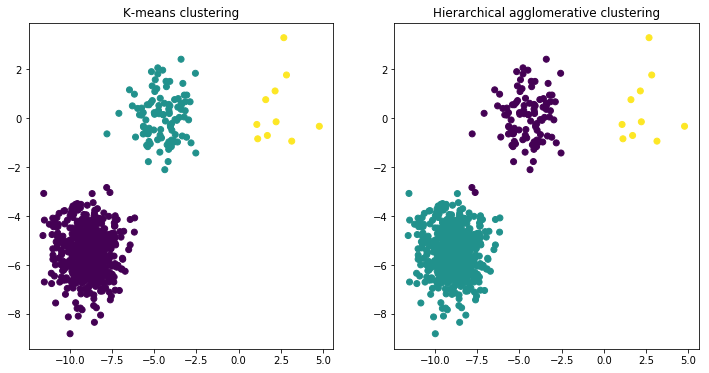

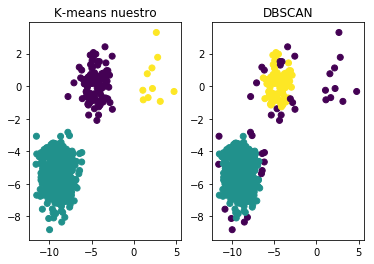

In [5]:
plt.figure(figsize=(12, 6))

# prepare dataset (unevenly sized blobs)
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))

# run k-means
y_pred_kmeans = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_filtered)
# run HAC
y_pred_hiearc = AgglomerativeClustering(n_clusters=3, linkage="average").fit_predict(X_filtered)
#Instancia de la clase kmeans, se ingresa el dataset digits y 10 como numero de clusters como parametros
kmeans = KmeansNuesto(X_filtered, 3)

#obtener membresia de k-means nuestro
membresia = kmeans.getAssign()

#dbscan
membresia_db = DBSCAN(metric='euclidean').fit_predict(X_filtered)

# plot k-means
plt.subplot(121)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred_kmeans)
plt.title("K-means clustering")

# plot HAC
plt.subplot(122)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred_hiearc)
plt.title("Hierarchical agglomerative clustering")
 
plt.show()

# plot kmeans nuestro
plt.subplot(121)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=membresia)
plt.title("K-means nuestro")

# dbscan
plt.subplot(122)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=membresia_db)
plt.title("DBSCAN")

plt.show()



## 5. Non-globular data

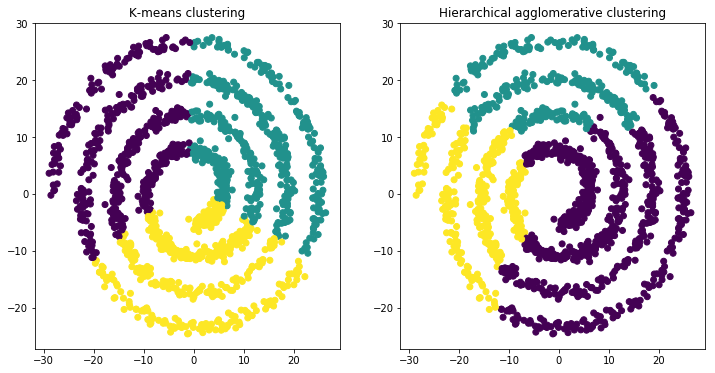

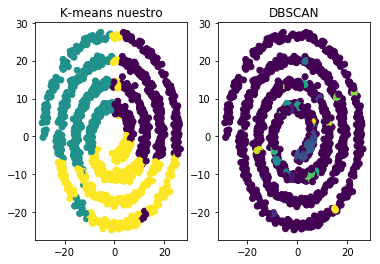

In [6]:
plt.figure(figsize=(12, 6))

# prepare dataset (non-globular data)
t = 1.5 * np.pi * (1 + 5 * np.random.rand(1, n_samples))
x = t * np.cos(t)
y = t * np.sin(t)
X_nonglob = np.concatenate((x, y))
X_nonglob += .7 * np.random.randn(2, n_samples) # random jitter
X_nonglob = X_nonglob.T

# run k-means
y_pred_kmeans = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_nonglob)
# run HAC
y_pred_hiearc = AgglomerativeClustering(n_clusters=3, linkage="average").fit_predict(X_nonglob)
#Instancia de la clase kmeans, se ingresa el dataset digits y 10 como numero de clusters como parametros
kmeans = KmeansNuesto(X_nonglob, 3)

#obtener membresia de k-means nuestro
membresia = kmeans.getAssign()

#dbscan
membresia_db = DBSCAN(metric='euclidean').fit_predict(X_nonglob)

# plot k-means
plt.subplot(121)
plt.scatter(X_nonglob[:, 0], X_nonglob[:, 1], c=y_pred_kmeans)
plt.title("K-means clustering")

# plot HAC
plt.subplot(122)
plt.scatter(X_nonglob[:, 0], X_nonglob[:, 1], c=y_pred_hiearc)
plt.title("Hierarchical agglomerative clustering")
 
plt.show()
# plot kmeans nuestro
plt.subplot(121)
plt.scatter(X_nonglob[:, 0], X_nonglob[:, 1], c=membresia)
plt.title("K-means nuestro")

# dbscan
plt.subplot(122)
plt.scatter(X_nonglob[:, 0], X_nonglob[:, 1], c=membresia_db)
plt.title("DBSCAN")
 
plt.show()

## 6. Real-world dataset (digits)

Score sklearn.kmeans metrics.adjusted_mutual_info_score =  0.734859327933
Score sklearn.kmeans metrics.adjusted_rand_score 0.667206124789
Score AgglomerativeClustering metrics.adjusted_mutual_info_score =  0.6521347211
Score AgglomerativeClustering metrics.adjusted_rand_score 0.514225594868
Score kmeans-nuestro metrics.adjusted_mutual_info_score =  0.652802929358
Score kmeans-nuestro metrics.adjusted_rand_score 0.569979063343
Score dbscan metrics.adjusted_mutual_info_score =  -3.98266237076e-17
Score dbscan metrics.adjusted_rand_score 0.0


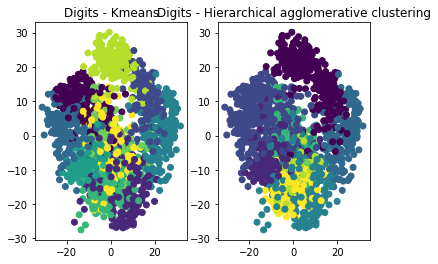

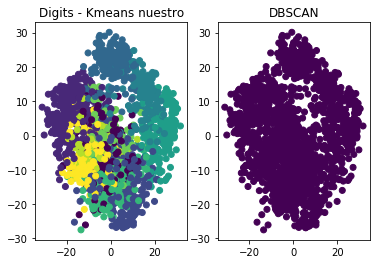

In [7]:
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html# CODE FOR THIS DATASET
#Dataset digits
# Import digits dataset

digits = datasets.load_digits()
#Instancia de la clase kmeans
kmeans = KmeansNuesto(digits.data, 10)

# run k-means
y_pred_kmeans = KMeans(n_clusters=10, random_state=random_state).fit_predict(digits.data)
print "Score sklearn.kmeans metrics.adjusted_mutual_info_score = ",metrics.adjusted_mutual_info_score(digits.target,y_pred_kmeans)
print "Score sklearn.kmeans metrics.adjusted_rand_score" ,metrics.adjusted_rand_score(digits.target,y_pred_kmeans)

# run HAC
y_pred_hiearc = AgglomerativeClustering(n_clusters=10, linkage="average").fit_predict(digits.data)
print "Score AgglomerativeClustering metrics.adjusted_mutual_info_score = ",metrics.adjusted_mutual_info_score(digits.target,y_pred_hiearc)
print "Score AgglomerativeClustering metrics.adjusted_rand_score" ,metrics.adjusted_rand_score(digits.target,y_pred_hiearc)
#obtener membresia de k-means nuestro
membresia = kmeans.getAssign()
print "Score kmeans-nuestro metrics.adjusted_mutual_info_score = ",metrics.adjusted_mutual_info_score(digits.target,membresia)
print "Score kmeans-nuestro metrics.adjusted_rand_score" ,metrics.adjusted_rand_score(digits.target,membresia)

#dbscan
membresia_db = DBSCAN(metric='euclidean').fit_predict(digits.data)
print "Score dbscan metrics.adjusted_mutual_info_score = ",metrics.adjusted_mutual_info_score(digits.target,membresia_db)
print "Score dbscan metrics.adjusted_rand_score" ,metrics.adjusted_rand_score(digits.target,membresia_db)
# PCA
#Reduccion de dimensiones con PCA
pca = PCA(n_components=2)
#fit and transform the data to the model
reduce_data_pca = pca.fit_transform(digits.data)

# visualizations
# plot k-means
plt.subplot(121)
plt.scatter(reduce_data_pca[:, 0], reduce_data_pca[:, 1], c=y_pred_kmeans)
plt.title("Digits - Kmeans")
# plot HAC
plt.subplot(122)
plt.scatter(reduce_data_pca[:, 0], reduce_data_pca[:, 1], c=y_pred_hiearc)
plt.title("Digits - Hierarchical agglomerative clustering")

plt.show()


# plot K-means nuestro
plt.subplot(121)
plt.scatter(reduce_data_pca[:, 0], reduce_data_pca[:, 1], c=membresia)
plt.title("Digits - Kmeans nuestro")

# plot dbscan
plt.subplot(122)
plt.scatter(reduce_data_pca[:, 0], reduce_data_pca[:, 1], c=membresia_db)
plt.title("DBSCAN")
plt.show()

Score sklearn.kmeans metrics.adjusted_mutual_info_score =  0.367563856454
Score sklearn.kmeans metrics.adjusted_rand_score 0.312413813434
Score AgglomerativeClustering metrics.adjusted_mutual_info_score =  0.301017567173
Score AgglomerativeClustering metrics.adjusted_rand_score 0.331918891095
Score kmeans-nuestro metrics.adjusted_mutual_info_score =  0.271611424844
Score kmeans-nuestro metrics.adjusted_rand_score 0.299235968361
Score dbscan metrics.adjusted_mutual_info_score =  -1.37585252396e-16
Score dbscan metrics.adjusted_rand_score 0.0


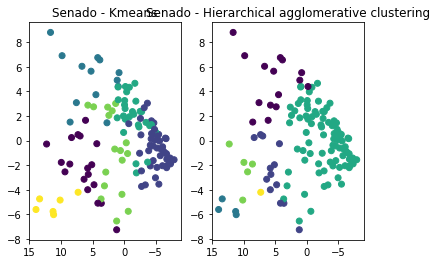

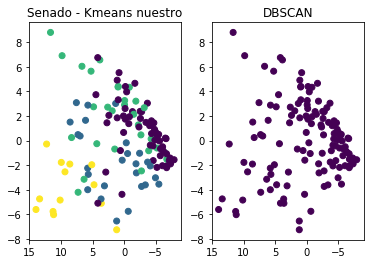

In [9]:
import pandas as pd
from numpy import asarray


# let's load the dataset from scikit-learn once again  
dataset =pd.read_csv("senado.csv", header=None)

# inicializar matriz contnedora de la transformacion de los votos
Matrix = [[0 for x in range(628)] for y in range(129)]
ii=0
jj=0

#Reocrte de dataset (solo tomar los votos) y transformacion de votos a numeros
for i in range(1,129):
    for j in range(3,630):
        if(dataset.get_value(i,j)=="PRO"):
            Matrix[ii][jj]= 1
        elif(dataset.get_value(i,j)=="CONTRA"):
            Matrix[ii][jj]= -1
        else:
            Matrix[ii][jj] = 0
        jj=jj+1
    jj=0
    ii=ii+1


ii=0
targets = [0 for x in range(129)]
for i in range(1,129):
    if(dataset.get_value(i,1)=="PRI"):
        targets[ii]=0
    elif(dataset.get_value(i,1)=="SG"):
        targets[ii]=1
    elif(dataset.get_value(i,1)=="PAN"):
        targets[ii]=2
    elif(dataset.get_value(i,1)=="PRD"):
        targets[ii]=3
    elif(dataset.get_value(i,1)=="PT"):
        targets[ii]=4
    elif(dataset.get_value(i,1)=="PVEM"):
        targets[ii]=5
    ii=ii+1
    
Matrix = asarray(Matrix)

#Instancia de la clase kmeans
kmeans = KmeansNuesto(Matrix, 6)



# clustering
# run k-means
y_pred_kmeans = KMeans(n_clusters=6, random_state=random_state).fit_predict(Matrix)
print "Score sklearn.kmeans metrics.adjusted_mutual_info_score = ",metrics.adjusted_mutual_info_score(targets,y_pred_kmeans)
print "Score sklearn.kmeans metrics.adjusted_rand_score" ,metrics.adjusted_rand_score(targets,y_pred_kmeans)
# run HAC
y_pred_hiearc = AgglomerativeClustering(n_clusters=6, linkage="average").fit_predict(Matrix)
print "Score AgglomerativeClustering metrics.adjusted_mutual_info_score = ",metrics.adjusted_mutual_info_score(targets,y_pred_hiearc)
print "Score AgglomerativeClustering metrics.adjusted_rand_score" ,metrics.adjusted_rand_score(targets,y_pred_hiearc)

#membresia de k-means nuestro 
membresia = kmeans.getAssign()
print "Score kmeans-nuestro metrics.adjusted_mutual_info_score = ",metrics.adjusted_mutual_info_score(targets,membresia)
print "Score kmeans-nuestro metrics.adjusted_rand_score" ,metrics.adjusted_rand_score(targets,membresia)

#dbscan
membresia_db = DBSCAN(metric='euclidean').fit_predict(Matrix)
print "Score dbscan metrics.adjusted_mutual_info_score = ",metrics.adjusted_mutual_info_score(targets,membresia_db)
print "Score dbscan metrics.adjusted_rand_score" ,metrics.adjusted_rand_score(targets,membresia_db)

# PCA
#Reduccion de dimensiones con PCA
pca = PCA(n_components=2)
#fit and transform the data to the model
reduce_data_pca = pca.fit_transform(Matrix)

# visualizations
# plot k-means
plt.subplot(121)
plt.scatter(reduce_data_pca[:, 0], reduce_data_pca[:, 1], c=y_pred_kmeans)
plt.title("Senado - Kmeans")
plt.gca().invert_xaxis()

# plot HAC
plt.subplot(122)
plt.scatter(reduce_data_pca[:, 0], reduce_data_pca[:, 1], c=y_pred_hiearc)
plt.title("Senado - Hierarchical agglomerative clustering")
plt.gca().invert_xaxis()

plt.show()



#plot K-means nuestro 
plt.subplot(121)
plt.scatter(reduce_data_pca[:, 0], reduce_data_pca[:, 1], c=membresia)
plt.title("Senado - Kmeans nuestro")
plt.gca().invert_xaxis()

#plot dbscan 
plt.subplot(122)
plt.scatter(reduce_data_pca[:, 0], reduce_data_pca[:, 1], c=membresia_db)
plt.title("DBSCAN")
plt.gca().invert_xaxis()
plt.show()
